In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
os.chdir("/home/saumya/Documents/Spec_data/PKL_dat_final/snr")

In [7]:
pred = np.load('pred_vals_lmc.npy')

In [11]:
pred

array([[4.24105284e+02, 5.19634603e-01, 3.64991678e+01],
       [5.63011179e+02, 4.71788734e-01, 1.37897797e+00],
       [6.55505681e+02, 4.87303674e-01, 2.97903208e+01],
       ...,
       [7.31409080e+02, 4.12783863e-01, 4.07334241e+01],
       [5.43942494e+02, 5.33907765e-01, 5.17636151e+01],
       [7.07604630e+02, 4.88655794e-01, 1.04893760e+01]])

In [8]:
true = np.load('true_vals_lmc.npy')

In [9]:
def bolts(A2, A3, x, x_o):
    A1 = 303
    a = []
    for i in range(len(A2)):
        b = A1 + (A2[i] - A1)/(1+np.exp((x-x_o[i])/A3[i]))
        a.append(b)
    return(np.array(a))

In [10]:
x = np.linspace(0, 55, 300)

In [15]:
Pred_pro = bolts(pred[:, 0], pred[:, 1], x, pred[:, 2])

In [17]:
True_pro = bolts(true[:, 0], true[:, 1], x, pred[:, 2])

/tmp/ipykernel_9809/4250135426.py:5: RuntimeWarning: overflow encountered in exp
  b = A1 + (A2[i] - A1)/(1+np.exp((x-x_o[i])/A3[i]))


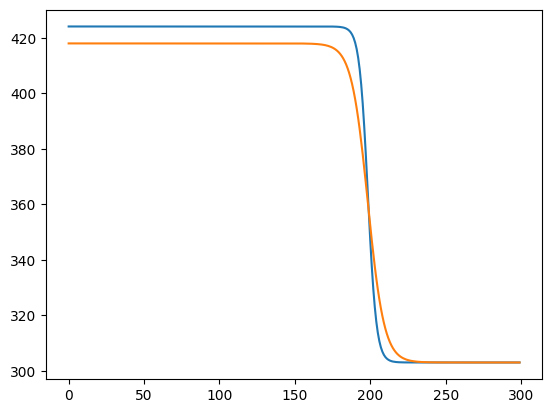

In [18]:
plt.plot(Pred_pro[0])
plt.plot(True_pro[0])

In [19]:
error_def = True_pro-Pred_pro

In [29]:
rms = []
for i in error_def:
    rms.append(np.sqrt(np.mean(i**2)))
rms = np.array(rms)

In [30]:
max(rms)

177.0823673065978

In [31]:
min(rms)

3.846192037413762e-05

In [32]:
np.sqrt(np.mean(rms**2))

18.33944546616859

In [37]:
#checking models now
import pickle

In [38]:
with open('gpr_LMC_Norm.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [87]:
test_exp = np.load('/home/saumya/Documents/Flame_dianostics-temperature_profile_estimation_using_ML/FINAL_VISUAL/test_hpu.npy')

In [99]:
test_exp_0 = np.load('/home/saumya/Documents/Flame_dianostics-temperature_profile_estimation_using_ML/FINAL_VISUAL/Exp_test.npy')

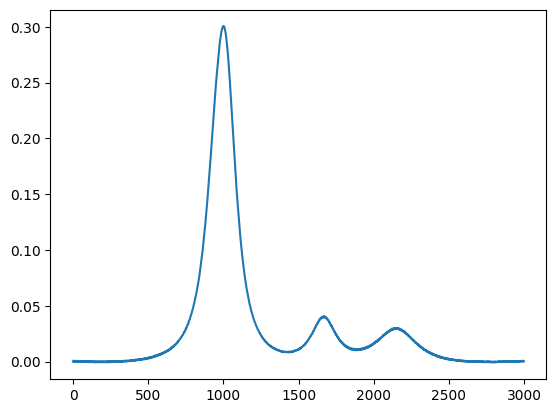

In [101]:
plt.plot(test_exp[0])

In [100]:
test_exp[0] = test_exp_0

In [89]:
# test_exp = test_exp/100

In [103]:
newX = test_exp

newX = np.concatenate((newX,np.zeros((np.shape(test_exp)[0],1))),1)
noise_dict = {'output_index':newX[:,-1].astype(int)}
ys_norm,var=loaded_model.predict(newX,Y_metadata=noise_dict)

In [104]:
ys_norm

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.98576858, -0.18136624, -0.67227648],
       [ 1.10309695, -0.13306998, -0.43258032],
       ...,
       [ 0.30019851,  0.04200828, -0.73144513],
       [ 0.44005016, -0.07587349,  1.63524634],
       [-0.45171324,  0.02820749,  0.45101438]])

In [85]:
np.zeros((np.shape(test_exp)[0],1)).shape

(3000, 1)

In [86]:
np.shape(test_exp)[0]

3000